In [1]:
#数据处理

from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500 #截断最大数量
batch_size = 32

(input_train, y_train),(input_test, y_test) = imdb.load_data(num_words = max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('sequence 格式：（samples*time）')
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)
print('input_train shape:',input_train.shape)
print('input_test shape:',input_test.shape)

Using TensorFlow backend.


25000 train sequences
25000 test sequences
sequence 格式：（samples*time）
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
y_train.shape

(25000,)

In [4]:
#用Embedding层和simpleRNN训练循环网络

from keras.layers import Dense, SimpleRNN, Embedding
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(
    input_train, y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 11s 557us/step - loss: 0.6381 - acc: 0.6188 - val_loss: 0.5027 - val_acc: 0.7874
Epoch 2/10
20000/20000 [==============================] - 10s 520us/step - loss: 0.4206 - acc: 0.8194 - val_loss: 0.4147 - val_acc: 0.8122
Epoch 3/10
20000/20000 [==============================] - 10s 520us/step - loss: 0.3112 - acc: 0.8752 - val_loss: 0.3508 - val_acc: 0.8488
Epoch 4/10
20000/20000 [==============================] - 10s 519us/step - loss: 0.2486 - acc: 0.9022 - val_loss: 0.4150 - val_acc: 0.8330
Epoch 5/10
20000/20000 [==============================] - 10s 522us/step - loss: 0.1935 - acc: 0.9287 - val_loss: 0.6329 - val_acc: 0.8020
Epoch 6/10
20000/20000 [==============================] - 10s 520us/step - loss: 0.1428 - acc: 0.9478 - val_loss: 0.3669 - val_acc: 0.8728
Epoch 7/10
20000/20000 [==============================] - 11s 525us/step - loss: 0.1018 - acc: 0.9652 - val_loss: 0.4

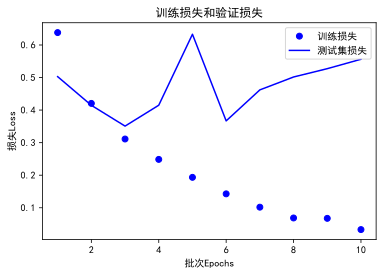

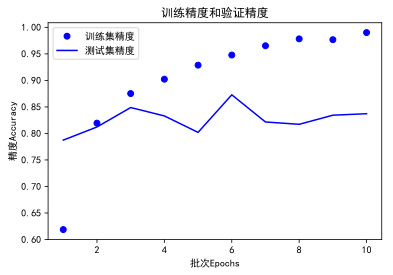

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values,'bo',label='训练损失') 
plt.plot(epochs, val_loss_values,'b',label='测试集损失') 
plt.title('训练损失和验证损失')
plt.xlabel('批次Epochs')
plt.ylabel('损失Loss')
plt.legend()
plt.show()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'bo',label='训练集精度') 
plt.plot(epochs, val_acc,'b',label='测试集精度') 
plt.title('训练精度和验证精度')
plt.xlabel('批次Epochs')
plt.ylabel('精度Accuracy')
plt.legend()
plt.show()

In [7]:
#用Embedding层和LSTM训练循环网络

from keras.layers import Dense, LSTM, Embedding
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(
    input_train, y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.5100 - acc: 0.7620 - val_loss: 0.3358 - val_acc: 0.8608
Epoch 2/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.2926 - acc: 0.8845 - val_loss: 0.3069 - val_acc: 0.8688
Epoch 3/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.2316 - acc: 0.9107 - val_loss: 0.2873 - val_acc: 0.8896
Epoch 4/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.1939 - acc: 0.9272 - val_loss: 0.3462 - val_acc: 0.8682
Epoch 5/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.1708 - acc: 0.9380 - val_loss: 0.2945 - val_acc: 0.8802
Epoch 6/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.1538 - acc: 0.9440 - val_loss: 0.3856 - val_acc: 0.8366
Epoch 7/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.1383 - acc: 0.9493 - val_loss: 0.5014 - val_acc:

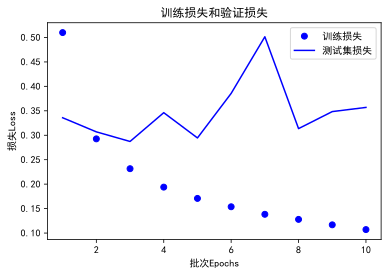

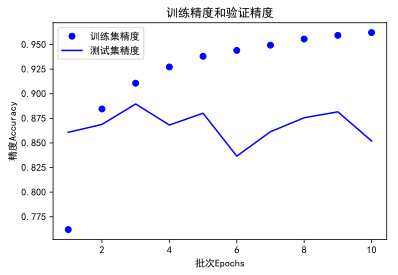

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values,'bo',label='训练损失') 
plt.plot(epochs, val_loss_values,'b',label='测试集损失') 
plt.title('训练损失和验证损失')
plt.xlabel('批次Epochs')
plt.ylabel('损失Loss')
plt.legend()
plt.show()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc,'bo',label='训练集精度') 
plt.plot(epochs, val_acc,'b',label='测试集精度') 
plt.title('训练精度和验证精度')
plt.xlabel('批次Epochs')
plt.ylabel('精度Accuracy')
plt.legend()
plt.show()

In [14]:
from keras.preprocessing.text import Tokenizer

samples = ['He is an engineer.', 'He uses PC to work.']

tokenizer = Tokenizer(num_words=1000) #创建分词器，设置为只考虑前1000个最常见的单词
tokenizer.fit_on_texts(samples) #构建单词索引

sequences = tokenizer.texts_to_sequences(samples) #将字符串转换为整数索引组成的列表

one_hot_results = tokenizer.texts_to_matrix(samples, mode = 'binary') #不仅能使用二进制，也支持one-hot外的向量化编码模式

word_index = tokenizer.word_index #找回单词索引
print('独立标签数：', len(word_index))
print(word_index)

独立标签数： 8
{'he': 1, 'is': 2, 'an': 3, 'engineer': 4, 'uses': 5, 'pc': 6, 'to': 7, 'work': 8}
